Реализуйте или найдите реализации двух сортировок: сортировка выбором и быстрая
сортировка. Проведите вычислительные эксперименты и нарисуйте графики,
показывающие зависимость времени выполнения двух алгоритмов от размера входных
данных. Рассмотрите три варианта входных данных:
1. Список случайных чисел
2. Отсортированный список
3. Отсортированный в обратную сторону список

Для каждого из вариантов должен быть свой график зависимости

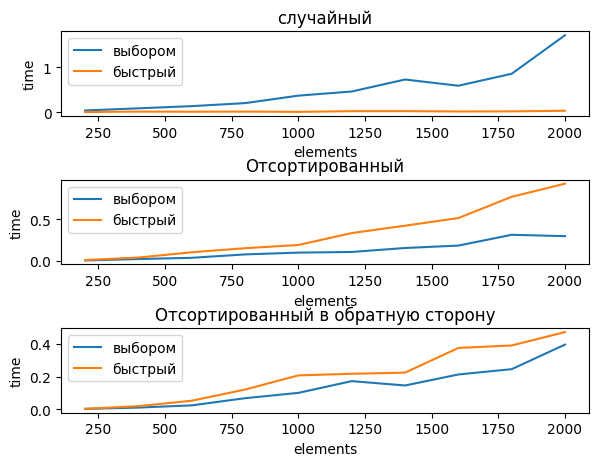

In [6]:
from timeit import Timer
import matplotlib.pyplot as plt
from numpy.random import randint
import sys


def selection(arr):
    size = len(arr)
    for i in range(size):
        min_index = i
        for j in range(i + 1, size):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]


def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if array[j] <= pivot:
            i += 1
            array[i], array[j] = array[j], array[i]
    array[i + 1], array[high] = array[high], array[i + 1]
    return i + 1


def quicksort(array, low, high):
    if low < high:
        pi = partition(array, low, high)
        quicksort(array, low, pi - 1)
        quicksort(array, pi + 1, high)


fig, axes = plt.subplots(3, 1)
plt.tight_layout(pad=2.5)

t_sel = Timer("selection(arr1)", globals=globals())
t_quick = Timer("quicksort(arr2, 0, len(arr2) - 1)", globals=globals())

#случайный
step = 200
plt_x, plt_s, plt_q = [], [], []
for i in range(step, step * 10 + 1, step):
    arr1 = randint(-step, step, [i])
    arr2 = randint(-step, step, [i])
    plt_x.append(i)
    plt_s.append(t_sel.timeit(number=1))
    plt_q.append(t_quick.timeit(number=1))


axes[0].set_title("случайный")
axes[0].set_xlabel("elements")
axes[0].set_ylabel("time")
axes[0].plot(plt_x, plt_s, label='выбором')
axes[0].plot(plt_x, plt_q, label='быстрый')
axes[0].legend()


# Отсортированный
sys.setrecursionlimit(2500)
step = 200
plt_x, plt_s, plt_q = [], [], []
for i in range(step, step * 10 + 1, step):
    arr1 = list(range(i))
    arr2 = list(range(i))
    plt_x.append(i)
    plt_s.append(t_sel.timeit(number=1))
    plt_q.append(t_quick.timeit(number=1))


axes[1].set_title("Отсортированный")
axes[1].set_xlabel("elements")
axes[1].set_ylabel("time")
axes[1].plot(plt_x, plt_s, label='выбором')
axes[1].plot(plt_x, plt_q, label='быстрый')
axes[1].legend()


# Отсортированный в обратную сторону
step = 200
plt_x, plt_s, plt_q = [], [], []
for i in range(step, step * 10 + 1, step):
    arr1 = list(range(i, 0, -1))
    arr2 = list(range(i, 0, -1))
    plt_x.append(i)
    plt_s.append(t_sel.timeit(number=1))
    plt_q.append(t_quick.timeit(number=1))


axes[2].set_title("Отсортированный в обратную сторону")
axes[2].set_xlabel("elements")
axes[2].set_ylabel("time")
axes[2].plot(plt_x, plt_s, label='выбором')
axes[2].plot(plt_x, plt_q, label='быстрый')
axes[2].legend()

plt.show()

Ряд Трибоначчи начинается с тройки 0, 0, 1, а каждое следующее число равно сумме
трёх предыдущих. Числа нумеруются с 0. Напишите функцию tribonacci(n), которая
принимает в себя номер числа и возвращает n-ое число Трибоначчи. Функция должна быть
рекурсивной. При решении данной задачи не используйте циклы.
Укажите базовый и рекурсивный случаи вашего алгоритма.

In [5]:
def tribonacci(n):
    if n == 0 or n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return (tribonacci(n - 1) +
                tribonacci(n - 2) +
                tribonacci(n - 3))


for n in range(11):
    print(f"{n} - {tribonacci(n)}")


0 - 0
1 - 0
2 - 1
3 - 1
4 - 2
5 - 4
6 - 7
7 - 13
8 - 24
9 - 44
10 - 81


Последовательно измените программу для рисования рекурсивного дерева по следующим
пунктам:
1. Измените толщину ветвей, чтобы при уменьшении branchLen линии становились
тоньше.
2. Измените цвет ветвей таким образом, чтобы самые короткие ветви окрашивались
как листья.
3. Измените угол поворота черепахи, чтобы каждая ветвь поворачивалась
произвольным образом в некотором диапазоне. Например, выбирайте угол между
15-ю и 45-ю градусами. Поэкспрериментируйте в поисках лучшего вида.
4. Измените рекурсивную часть branchLen, чтобы каждый раз вычиталось
произвольное значение из некоторого диапазона вместо некой постоянной
величины.

В отчете приведите несколько примеров получившихся деревьев.


In [9]:
import turtle
import random


def tree(branchLen, t):
    if branchLen > 5:
        t.pensize(branchLen/8)
        angle = random.randint(15, 45)
        length = random.randint(5, 15)

        t.forward(branchLen)
        t.right(angle)
        tree(branchLen - length, t)
        t.left(angle * 2)
        tree(branchLen - length, t)
        t.right(angle)
        t.backward(branchLen)
        
        # 2
        t.color("brown")
    else:
        t.color("green")


def main():
    t = turtle.Turtle()
    turtle.tracer(0, 0)
    myWin = turtle.Screen()
    t.left(90)
    t.up()
    t.backward(100)
    t.down()
    t.color("brown")
    tree(75, t)
    myWin.exitonclick()

if __name__ == "__main__":
    main()

![alt text](tree1.png "Title")
![alt text](tree2.png "Title")
![alt text](tree3.png "Title")
![alt text](tree4.png "Title")


При помощи модуля turtle нарисуйте фрактал, указанный в вашем варианте 

Вариант 5. Треугольник Серпинского.

In [29]:
import turtle


def sierpinski(length, depth):
    if depth == 0:
        for _ in range(0, 3):
            t.forward(length)
            t.left(120)
    else:
        sierpinski(length / 2, depth - 1)
        t.forward(length / 2)
        sierpinski(length / 2, depth - 1)
        t.backward(length / 2)
        
        t.left(60)
        t.forward(length / 2)
        t.right(60)
        sierpinski(length / 2, depth - 1)
        
        t.left(60)
        t.backward(length / 2)
        t.right(60)


window = turtle.Screen()
window.setworldcoordinates(-1, -1, window.window_width() - 1, window.window_height() - 1)
t = turtle.Turtle()
turtle.tracer(0, 0)
sierpinski(900, 6)
window.exitonclick()

![alt text](serpinskiy.jpg "Title")

Найдите или придумайте алгоритм для рисования фрактальных гор. Подсказка: одним
из возможных методов будет использование треугольников.


In [83]:
from random import randint
import turtle


def mountaint(length, t):
    angle = randint(50, 80)
    len = randint(40, 100)
    if t.xcor() < 500:
        t.left(angle)
        t.forward(4*length)
        t.right(2*angle)
        t.forward(length/2)
        t.right(180 - 2*angle)
        t.forward(length/2)
        t.right(2*angle)
        t.forward(length/2)
        t.right(180 - 2*angle)
        t.forward(length/2)
        t.right(2*angle)
        t.forward(4*length)
        t.left(angle)
        mountaint(len, t)


def main():
    t = turtle.Turtle()
    t.up()
    t.goto(-470, -400)
    t.down()
    t.color("black", "black")
    mountaint(120, t)
    turtle.mainloop()

main()

![alt text](mountaint.png "Title")

![alt text](num6.png "Title")


In [47]:
import numpy as np


#проверка на ноль
def findNextCellToFill(grid, i, j,a):
    for x in range(i,a):
            for y in range(j,a):
                    if grid[x][y] == 0:    
                        return x,y
    for x in range(0,a):
        for y in range(0,a):
            if grid[x][y] == 0:
                return x,y
    return -1,-1

#проверка в ячейках
def isValid(grid, i, j, e,a):
    global razmer
    #есть ли в строке
    stroka = all([e != grid[i][x] for x in range(a)])
    if stroka:
        #есть ли в столбце
        stolbec = all([e != grid[x][j] for x in range(a)])
        if stolbec:
            #поиск границ ячейки
            secTopX, secTopY = razmer *(i//razmer), razmer *(j//razmer) 
            for x in range(secTopX, secTopX+razmer):
                for y in range(secTopY, secTopY+razmer):
                    #если в ячейке уже есть такая же цифра которую хочу поставить, то некст
                    if grid[x][y] == e:
                        return False
            return True
    return False

def solveSudoku(grid, size,i=0, j=0):
    #поиск следующей нулевой клетки
    i,j = findNextCellToFill(grid, i, j,size)

    if i == -1:
        return True
    for e in range(1,size+1):
        if isValid(grid,i,j,e,size):
            grid[i][j] = e
            #рекурсия
            if solveSudoku(grid, size,i, j):
                return True
            grid[i][j] = 0
    return False

arr=np.array([[0,0,0,0],
              [0,0,2,0],
              [0,1,0,0],
              [3,0,0,4]])

a=len(arr)
razmer=2 # размерность судоку

print(arr)
print(solveSudoku(arr,a))
print(arr)

[[0 0 0 0]
 [0 0 2 0]
 [0 1 0 0]
 [3 0 0 4]]
True
[[2 3 4 1]
 [1 4 2 3]
 [4 1 3 2]
 [3 2 1 4]]
